In [1]:
import numpy as np
import pandas as pd

## Exploración Inicial de datos

In [2]:
data = np.load('proyecto_training_data.npy')
print(data)

[[2.08500e+05 7.00000e+00 8.56000e+02 8.00000e+00 2.00300e+03 6.50000e+01]
 [1.81500e+05 6.00000e+00 1.26200e+03 6.00000e+00 1.97600e+03 8.00000e+01]
 [2.23500e+05 7.00000e+00 9.20000e+02 6.00000e+00 2.00100e+03 6.80000e+01]
 ...
 [2.66500e+05 7.00000e+00 1.18800e+03 9.00000e+00 1.94100e+03 6.60000e+01]
 [1.42125e+05 5.00000e+00 1.07800e+03 5.00000e+00 1.95000e+03 6.80000e+01]
 [1.47500e+05 5.00000e+00 1.25600e+03 6.00000e+00 1.96500e+03 7.50000e+01]]


In [3]:
dataset = pd.DataFrame(data, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dataset.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [4]:
# Obtener tipos del dataset
dataset.dtypes

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object

In [5]:
# Analisis rapido del dataset
dataset.describe() 

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Resolver casos de datos null imputando la media

In [6]:
# Ver el porcentaje de datos nulos por cada columna
columnas = dataset.columns
for col in columnas:
    porcentaje_na = dataset[col].isnull().mean()
    print(f"{col}: {porcentaje_na}")

SalePrice: 0.0
OverallQual: 0.0
1stFlrSF: 0.0
TotRmsAbvGrd: 0.0
YearBuilt: 0.0
LotFrontage: 0.1773972602739726


In [7]:
# Reemplazar los datos nulos 
# Para corregir esto, podemos imputar la media (sustituir los valores NaN por la media)
promedio = dataset['LotFrontage'].mean()
dataset['LotFrontage'].fillna(promedio, inplace=True)

In [8]:
# Verificamos de nuevo el porcentaje de datos nulos
columnas = dataset.columns
for col in columnas:
    porcentaje_na = dataset[col].isnull().mean()
    print(f"{col}: {porcentaje_na}")

SalePrice: 0.0
OverallQual: 0.0
1stFlrSF: 0.0
TotRmsAbvGrd: 0.0
YearBuilt: 0.0
LotFrontage: 0.0


## Usando sclicing con NumPy 

Entrenamiento (80%) 

Validación y pruebas (20%).

In [9]:
print("Total de registros:\n", len(data))

Total de registros:
 1460


In [10]:
# Calcular la cantidad de valores representativa del 80%
num_80_percent_from_total = int(len(data) * 0.8) 
print(num_80_percent_from_total)

1168


In [11]:
data_80 = data[:num_80_percent_from_total, :]
data_20 = data[num_80_percent_from_total:, :]

print("Total equivalente al 80% de los datos:\n", len(data_80))
print("Total equivalente al 20% de los datos:\n", len(data_20))

Total equivalente al 80% de los datos:
 1168
Total equivalente al 20% de los datos:
 292


## Análisis exploratorio de datos e histograma con Seaborn por cada variable

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
# Comienzo por transformar mis datos para entrenamiento en un DataFrame
dataset_training = pd.DataFrame(data_80, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
dataset_training.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


-------------------------------
SalePrice
-------------------------------

Media: 180590.27739726027
Valor mínimo: 34900.0
Valor máximo: 755000.0
Rango: 720100.0
Desviacion Estándar: 78815.69790179149



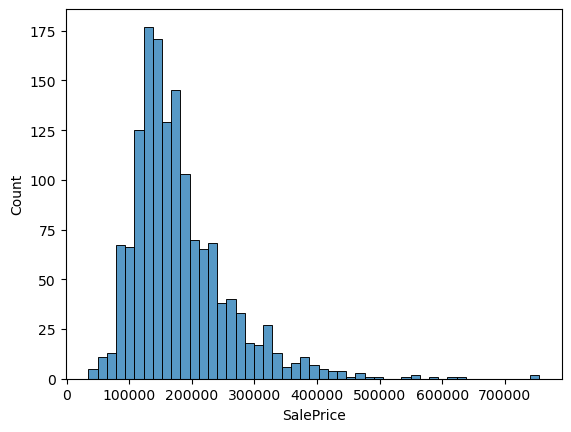



-------------------------------
OverallQual
-------------------------------

Media: 6.101027397260274
Valor mínimo: 1.0
Valor máximo: 10.0
Rango: 9.0
Desviacion Estándar: 1.3780252276191631



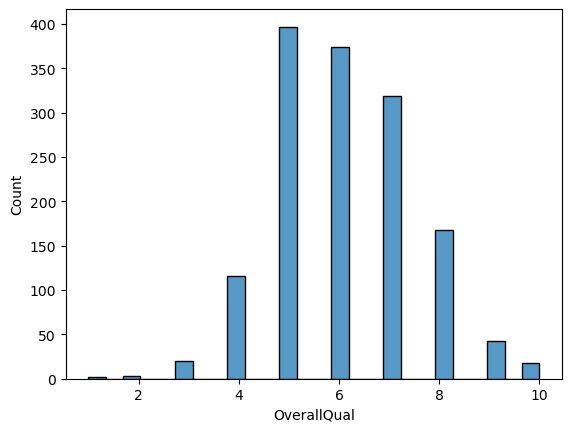



-------------------------------
1stFlrSF
-------------------------------

Media: 1156.3236301369864
Valor mínimo: 334.0
Valor máximo: 3228.0
Rango: 2894.0
Desviacion Estándar: 373.7803744886528



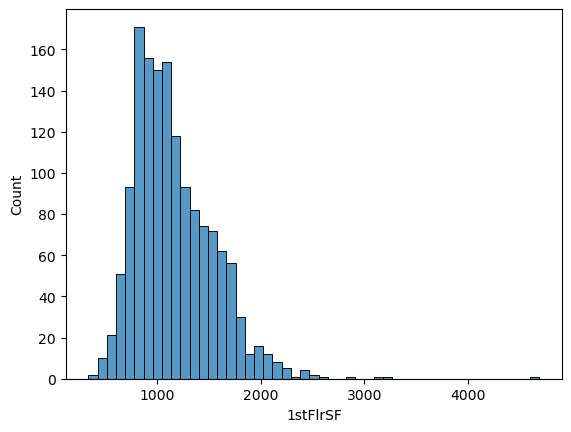



-------------------------------
TotRmsAbvGrd
-------------------------------

Media: 6.4854452054794525
Valor mínimo: 2.0
Valor máximo: 14.0
Rango: 12.0
Desviacion Estándar: 1.6091407087243883



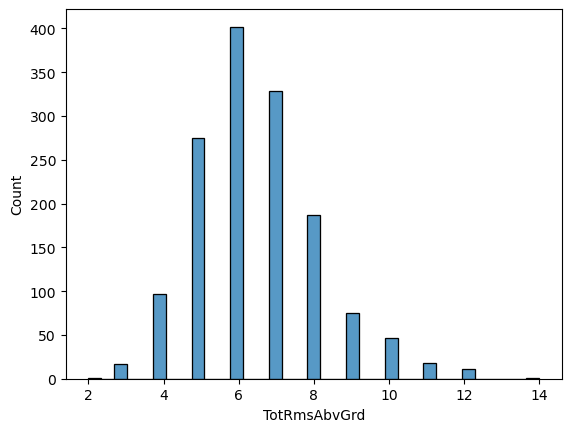



-------------------------------
YearBuilt
-------------------------------

Media: 1971.451198630137
Valor mínimo: 1875.0
Valor máximo: 2010.0
Rango: 135.0
Desviacion Estándar: 29.95170660645528



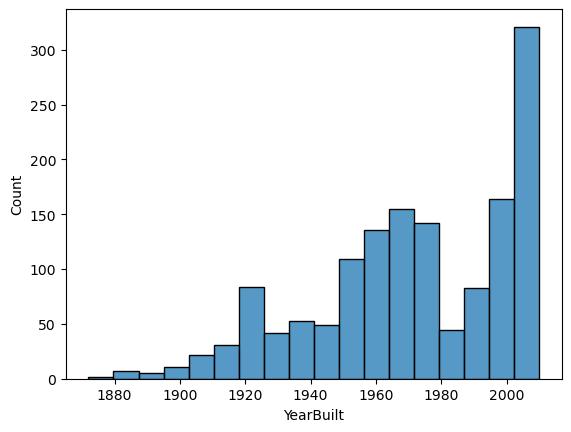



-------------------------------
LotFrontage
-------------------------------

Media: 69.96514676696361
Valor mínimo: 21.0
Valor máximo: 313.0
Rango: 292.0
Desviacion Estándar: 21.305467862840683



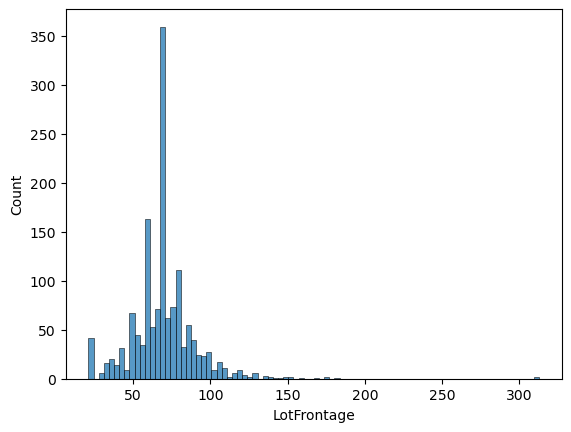

In [14]:
columnas = dataset_training.columns
for col in columnas:
    stats = dataset_training[col].describe()
    print('-------------------------------')
    print(col)
    print('-------------------------------\n')
    print('Media:', stats['mean'])
    print('Valor mínimo:', stats['min'])
    print('Valor máximo:', stats['max'])
    print('Rango:', stats['max'] - stats['min'])
    print('Desviacion Estándar:', stats['std'])
    print()
    # Uso el grafico de histograma de Seaborn, donde el primer parametro es la fuente de datos, y en x que los tome por columna
    sns.histplot(dataset, x=col)
    plt.show()
    print('\n')

In [15]:
# Se que la dependiente (y) es SalePrice, entonces para analizar la correlacion con y creo un nuevo DF con solo las demás variables independientes
ds_independent_training = dataset_training.drop('SalePrice', axis=1)
ds_independent_training.head()

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,7.0,856.0,8.0,2003.0,65.0
1,6.0,1262.0,6.0,1976.0,80.0
2,7.0,920.0,6.0,2001.0,68.0
3,7.0,961.0,7.0,1915.0,60.0
4,8.0,1145.0,9.0,2000.0,84.0


## Calculos Iniciales


In [16]:
print(data_80)

[[2.0850e+05 7.0000e+00 8.5600e+02 8.0000e+00 2.0030e+03 6.5000e+01]
 [1.8150e+05 6.0000e+00 1.2620e+03 6.0000e+00 1.9760e+03 8.0000e+01]
 [2.2350e+05 7.0000e+00 9.2000e+02 6.0000e+00 2.0010e+03 6.8000e+01]
 ...
 [2.3317e+05 7.0000e+00 1.5020e+03 7.0000e+00 2.0090e+03 7.9000e+01]
 [2.4535e+05 8.0000e+00 1.6940e+03 7.0000e+00 2.0080e+03 6.4000e+01]
 [1.7300e+05 6.0000e+00 9.5900e+02 7.0000e+00 2.0000e+03 5.8000e+01]]


In [17]:
data_80_means = np.mean(data_80, axis=0)
print(data_80_means)

[1.80590277e+05 6.10102740e+00 1.15632363e+03 6.48544521e+00
 1.97145120e+03 6.99651468e+01]


#### Función para calcular datos relevantes para la correlación
Creo un vector/matriz con las siguientes columnas, [ Yi , Yi - Promedio(Yi), (Yi - Promedio(Yi))^2 ]

![Formula correlación](https://blog.hubspot.es/hs-fs/hubfs/F%C3%B3rmula%20de%20la%20correlaci%C3%B3n.png?width=400&height=141&name=F%C3%B3rmula%20de%20la%20correlaci%C3%B3n.png)

In [82]:
def calc_columns(mean, data_vector):
    # Paso 1: Crear columna con la resta del valor (y) y la media de la columna (y)
    vector_minus_mean = data_vector - mean
    #print(saleprice_minus_mean)
    #print('----------')
    
    # Step 2: Hacer stack horizontal de la nueva columna
    result = np.hstack((data_vector, vector_minus_mean))
    #print(result)
    #print('----------')
    
    # Step 3: Elevar al cuadrado la resta del valor (y) y la media de la columna (y)
    vector_minus_mean_square = vector_minus_mean ** 2
    #print(saleprice_minus_mean_square)
    #print('----------')
    
    # Step 4: Hacer stack horizontal de la nueva columna de cuadrados
    result2 = np.hstack((result, vector_minus_mean_square))
    print(result2)
    
    return result2

In [124]:
def calc_correlation_custom(data_matrix_x, data_matrix_y):
    sum_product_xminusmean_yminusmean = np.sum(data_matrix_x[:,[1]] * data_matrix_y[:,[1]])
    #print(sum_product_xminusmean_yminusmean)
    
    sum_xminusmean_square = np.sum(data_matrix_x[:,[2]])
    #print(sum_xminusmean_square)
    
    sum_yminusmean_square= np.sum(data_matrix_y[:,[2]])
    #print(sum_yminusmean_square)
    
    correlacion_coeficente = sum_product_xminusmean_yminusmean / np.sqrt((sum_xminusmean_square) * (sum_yminusmean_square))
    return correlacion_coeficente

In [125]:
def calc_correlation_numpy(data_vector_x, data_vector_y):
    data_vector_x_flattened = data_vector_x.flatten()
    data_vector_y_flattened = data_vector_y.flatten()
    
    #print(data_vector_x_flattened)
    #print(data_vector_y_flattened)
    
    r = np.corrcoef(data_vector_x_flattened, data_vector_y_flattened)
    correlation_coeficente = r[0, 1]
    return correlation_coeficente

### SalePrice
**Esta es la variable dependiente.** 

Entonces en este caso es  [ Xi , Xi - Promedio(Xi), (Xi - Promedio(Xi))^2 ]

In [117]:
saleprice_mean = data_80_means[0]
#print(saleprice_mean)

saleprice_vector = data_80[:,[0]]
#print(saleprice_vector)

saleprice_calculations = calc_columns(saleprice_mean, saleprice_vector)


#print('\n----- Promedio de Xi - Promedio(Xi) -----')
#sum_x = np.sum(saleprice_calculations[:,[1]])
#print(sum_x)

#print('\n----- Promedio de (Xi - Promedio(Xi))^2 -----')
#sum_x_square = np.sum(saleprice_calculations[:,[2]])
#print(sum_x_mean)


[[ 2.08500000e+05  2.79097226e+04  7.78952616e+08]
 [ 1.81500000e+05  9.09722603e+02  8.27595214e+05]
 [ 2.23500000e+05  4.29097226e+04  1.84124429e+09]
 ...
 [ 2.33170000e+05  5.25797226e+04  2.76462723e+09]
 [ 2.45350000e+05  6.47597226e+04  4.19382167e+09]
 [ 1.73000000e+05 -7.59027740e+03  5.76123110e+07]]


---

**A partir de aquí, estas son las variables independientes**

La matriz de cada variable independiente tiene la estructura: [ Yi , Yi - Promedio(Yi), (Yi - Promedio(Yi))^2 ]


#### Función para imprimir coeficientes de correlación con respecto a SalePrice

In [129]:
def print_corr_coef_with_saleprice(name, calculations, vector ):
    print('\n-------------------------')
    print('Correlacion entre SalePrice -', name)
    print('-------------------------')

    print('Usando mi funcion custom:', 
          calc_correlation_custom(saleprice_calculations, calculations))

    print('Usando funcion de numpy: ', 
          calc_correlation_numpy(saleprice_vector, vector))

### OverallQual

In [130]:
overallqual_mean = data_80_means[1]
#print(overallqual_mean)

overallqual_vector = data_80[:,[1]]
#print(overallqual_vector)

overallqual_calculations = calc_columns(overallqual_mean, overallqual_vector)

print_corr_coef_with_saleprice('OverallQual', overallqual_calculations, overallqual_vector)

[[ 7.          0.8989726   0.80815174]
 [ 6.         -0.1010274   0.01020653]
 [ 7.          0.8989726   0.80815174]
 ...
 [ 7.          0.8989726   0.80815174]
 [ 8.          1.8989726   3.60609695]
 [ 6.         -0.1010274   0.01020653]]

-------------------------
Correlacion entre SalePrice - OverallQual
-------------------------
Usando mi funcion custom: 0.7939900504626409
Usando funcion de numpy:  0.7939900504626405


### 1stFlrSF

In [131]:
firstflrsf_mean = data_80_means[2]
#print(firstflrsf_mean)

firstflrsf_vector = data_80[:,[2]]
#print(firstflrsf_vector)

firstflrsf_calculations = calc_columns(firstflrsf_mean, firstflrsf_vector)

print_corr_coef_with_saleprice('1stFlrSF', firstflrsf_calculations, firstflrsf_vector)

[[ 8.56000000e+02 -3.00323630e+02  9.01942828e+04]
 [ 1.26200000e+03  1.05676370e+02  1.11674951e+04]
 [ 9.20000000e+02 -2.36323630e+02  5.58488582e+04]
 ...
 [ 1.50200000e+03  3.45676370e+02  1.19492153e+05]
 [ 1.69400000e+03  5.37676370e+02  2.89095879e+05]
 [ 9.59000000e+02 -1.97323630e+02  3.89366150e+04]]

-------------------------
Correlacion entre SalePrice - 1stFlrSF
-------------------------
Usando mi funcion custom: 0.6162887000998716
Usando funcion de numpy:  0.6162887000998717


### TotRmsAbvGrd

In [133]:
totrmsabvgrd_mean = data_80_means[3]
#print(totrmsabvgrd_mean)

totrmsabvgrd_vector = data_80[:,[3]]
#print(totrmsabvgrd_vector)

totrmsabvgrd_calculations = calc_columns(totrmsabvgrd_mean, totrmsabvgrd_vector)

print_corr_coef_with_saleprice('TotRmsAbvGrd', totrmsabvgrd_calculations, totrmsabvgrd_vector)

[[ 8.          1.51455479  2.29387623]
 [ 6.         -0.48544521  0.23565705]
 [ 6.         -0.48544521  0.23565705]
 ...
 [ 7.          0.51455479  0.26476664]
 [ 7.          0.51455479  0.26476664]
 [ 7.          0.51455479  0.26476664]]

-------------------------
Correlacion entre SalePrice - TotRmsAbvGrd
-------------------------
Usando mi funcion custom: 0.5647069399593065
Usando funcion de numpy:  0.5647069399593065


### YearBuilt

In [134]:
yearbuilt_mean = data_80_means[4]
#print(yearbuilt_mean)

yearbuilt_vector = data_80[:,[4]]
#print(yearbuilt_vector)

yearbuilt_calculations = calc_columns(yearbuilt_mean, yearbuilt_vector)

print_corr_coef_with_saleprice('YearBuilt', yearbuilt_calculations, yearbuilt_vector)

[[2003.           31.54880137  995.32686788]
 [1976.            4.54880137   20.6915939 ]
 [2001.           29.54880137  873.1316624 ]
 ...
 [2009.           37.54880137 1409.91248431]
 [2008.           36.54880137 1335.81488157]
 [2000.           28.54880137  815.03405966]]

-------------------------
Correlacion entre SalePrice - YearBuilt
-------------------------
Usando mi funcion custom: 0.5341706927117515
Usando funcion de numpy:  0.5341706927117515


### LotFrontage

In [135]:
lotfrontage_mean = data_80_means[5]
#print(lotfrontage_mean)

lotfrontage_vector = data_80[:,[5]]
#print(lotfrontage_vector)

lotfrontage_calculations = calc_columns(lotfrontage_mean, lotfrontage_vector)

print_corr_coef_with_saleprice('LotFrontage', lotfrontage_calculations, lotfrontage_vector)

[[ 65.          -4.96514677  24.65268242]
 [ 80.          10.03485323 100.69827941]
 [ 68.          -1.96514677   3.86180182]
 ...
 [ 79.           9.03485323  81.62857294]
 [ 64.          -5.96514677  35.58297595]
 [ 58.         -11.96514677 143.16473715]]

-------------------------
Correlacion entre SalePrice - LotFrontage
-------------------------
Usando mi funcion custom: 0.3485384688906943
Usando funcion de numpy:  0.3485384688906943


In [26]:
dataset_training.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000,1168.000000
mean,180590.277397,6.101027,1156.323630,6.485445,1971.451199,69.965147
std,78815.697902,1.378025,373.780374,1.609141,29.951707,21.305468
min,34900.000000,1.000000,334.000000,2.000000,1875.000000,21.000000
25%,129900.000000,5.000000,882.000000,5.000000,1954.000000,60.000000
50%,162950.000000,6.000000,1086.000000,6.000000,1973.000000,70.049958
75%,214000.000000,7.000000,1390.250000,7.000000,2000.000000,79.000000
max,755000.000000,10.000000,3228.000000,14.000000,2010.000000,313.000000
